In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [52]:
def dataimporter(filename):
    if type(filename) != str:
        raise("Filename not input as string")
    data = pd.read_csv(filename, header=46)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    return nummerdata
def plotter(ax,data,zo,colour,label):
    ax.plot(data[:,0],data[:,1],zorder=zo, lw = 4, color = colour, label =label)
    ax.fill_between(data[:,0],data[:,1],zorder=zo, color = colour)
   
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def data_integration(data,under=2.2,over=2.6,avgunder=2.65,avgover=2.8 ):
    
    intunder = np.where(data[:,0]==find_nearest(data[:,0],under))
    intover = np.where(data[:,0]==find_nearest(data[:,0],over))
    placeunder = np.where(data[:,0]==find_nearest(data[:,0],avgunder))
    placeover = np.where(data[:,0]==find_nearest(data[:,0],avgover))
    
    intunder = np.reshape(intunder,-1)
    intover = np.reshape(intover,-1)
    placeunder = np.reshape(placeunder, -1)
    placeover = np.reshape(placeover, -1)

    data[:,1] = data[:,1]-np.average(data[placeunder[0]:placeover[0],1])

    top1 = np.sum(data[intunder[0]:intover[0],1])
    return top1

In [4]:
print(type("hej"))

<class 'str'>


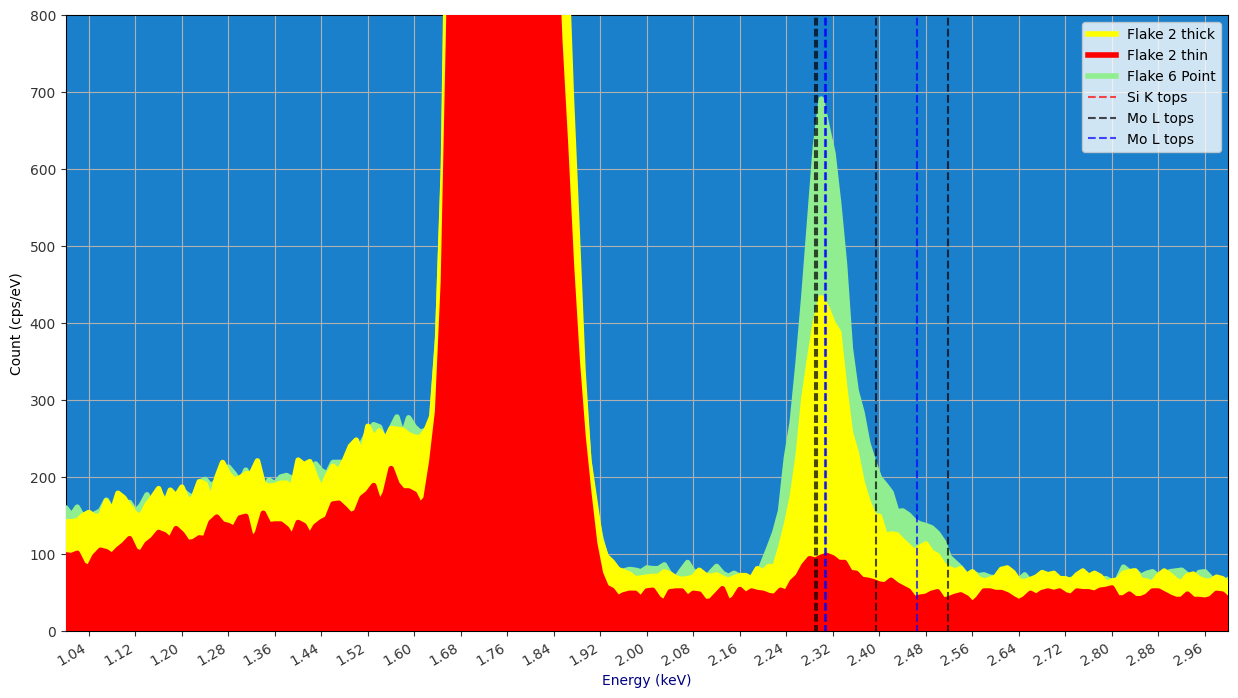

In [47]:
data = dataimporter("Thicker part Flake 2.txt")
data2 = dataimporter("Thin part Flake 2 new.txt")
data31 = dataimporter("Flake 6 Area.txt")
data32 = dataimporter("Flake 6 Point.txt")


Molines = [2.29316, 2.28985, 2.39481, 2.5183]
Silines = [1.73998,1.73938, 1.83594]
Slines = [2.30784,2.30664,2.46404]
Nticks = 30
xmax = 3
xmin = 1
ymax = 800#np.max(data[:,1])+1000


fig, ax = plt.subplots()
fig.set_size_inches(15,8)
fmt = lambda x, pos: '{}'.format(x).rstrip('0')
plotter(ax,data,5,"yellow","Flake 2 thick")
plotter(ax,data2,6,"red","Flake 2 thin")
# plotter(ax,data31,3,"green","Flake 6 Area")
plotter(ax,data32,4,"lightgreen","Flake 6 Point")
# ax.plot(data[:,0],data[:,1],zorder=5, lw = 4, color = "yellow", label = "flake 2 thick")
# ax.fill_between(data[:,0],data[:,1],zorder=5, color = "yellow",)
# ax.plot(data2[:,0],data2[:,1],zorder=6, lw = 4, color = "red")
# ax.plot(data31[:,0],data31[:,1],zorder=6, lw = 4, color = "green")
# ax.plot(data32[:,0],data32[:,1],zorder=6, lw = 4, color = "lightgreen")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.xaxis.set_major_locator(ticker.MaxNLocator(Nticks))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x).rstrip('0')))
ax.grid(zorder = 1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,ymax])
ax.set_facecolor((0.1, 0.5, 0.8))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('navy')
ax.tick_params(colors=(0.2, 0.2, 0.2), which ='both')
ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Count (cps/eV)")

ax.vlines(Silines,-1000,ymax, colors="red",linestyles="dashed", alpha = 0.7, label="Si K tops",zorder = 10)#Silicon K tops
ax.vlines(Molines,-1000,ymax, colors="black",linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#Mo L tops
ax.vlines(Slines,-1000,ymax, colors=(0,0,1),linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#S K tops
ax.legend()

plt.show()

4044.000000000001
469.33333333333326
7539.333333333334


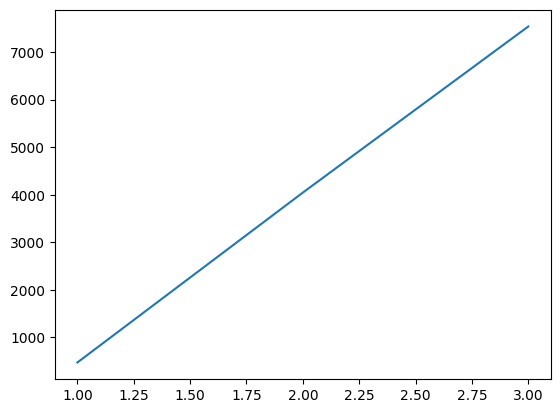

In [62]:
thickness = np.array([1,2,3])
under =2.2
over = 2.6




print(data_integration(data))
print(data_integration(data2))
print(data_integration(data31))

array = np.array([])

for i in ([data2,data,data31]):
    array = np.append(array,data_integration(i))

plt.plot(thickness,array)